In [1]:
# Package, Option, and User-defined functions

# Do not want to see redundant warning
# Source: https://docs.python.org/3/library/warnings.html
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
# Importing pandas functionaliity
import pandas as pd
# Importing numpy an open-source to use a multi-dimeensional arrray and matrix data structures
import numpy as np
# random number generation
import random as rand 
#import gender_guesser.detector as gender # guess gender based on (given) name

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# setting pandas print options
pd.set_option("display.max_columns", 500)
# pd.set_option('display.max_rows', 500)
pd.set_option("display.max_rows", 5000)
# setting pandas print options
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

# time script
import time


# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To build sklearn model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer 
from sklearn.model_selection import RandomizedSearchCV  # hyperparameter tuning
from sklearn.metrics import roc_auc_score
# To get different metric scores
from sklearn import metrics
from sklearn.metrics import f1_score,accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

        
t0 = time.time()

# 1) Exploratory Data Analysis

In [2]:
# Reading the files into Python
data = pd.read_excel("./_data/GOT_character_predictions.xlsx", index_col=0)
# Checking out the data set
data

,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
6,Tommen Baratheon,NaN,NaN,NaN,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,1.000000,1
7,Valarr Targaryen,Hand of the King,Valyrian,183.0,NaN,NaN,NaN,House Targaryen,Kiera of Tyrosh,0,0,0,0,0,NaN,NaN,NaN,1.0,1,1,26.0,0,0.431438,0
8,Viserys I Targaryen,NaN,NaN,NaN,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,0.678930,0
9,Wilbert,Ser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.006689,0


In [3]:
#showing the current size of array
data.shape

(1946, 24)

## 1.1) Missing Values

In [4]:
#Finding out the percentage of missing values in each categories in 2 decimal places
# One can see that data is not missing any values in "name", "book1_A_Game_Of_Thrones", "book2_A_Clash_Of_Kings", 
#"book3_A_Storm_Of_Swords", "book4_A_Feast_For_Crows", "book5_A_Dance_with_Dragons","is_Married",
#"is_Noble","numDeadRelations","Popularity","is_Alive"
pd.DataFrame(
    data={
        "% of Missing Values": round(data.isna().sum() / data.isna().count() * 100, 2)
    }
)

,% of Missing Values
name,0.00
title,51.80
culture,65.21
dateOfBirth,77.75
mother,98.92
father,98.66
heir,98.82
house,21.94
spouse,85.82
book1_A_Game_Of_Thrones,0.00


In [5]:
# setting random seed
rand.seed(a = 219)


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying path and file name
file = './_data/GOT_character_predictions.xlsx' 


# reading the file into Python
gender_df = pd.read_excel(file, index_col=0)

# checking the first 10 rows of the dataset
gender_df.head(n = 10)

,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
6,Tommen Baratheon,NaN,NaN,NaN,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,1.000000,1
7,Valarr Targaryen,Hand of the King,Valyrian,183.0,NaN,NaN,NaN,House Targaryen,Kiera of Tyrosh,0,0,0,0,0,NaN,NaN,NaN,1.0,1,1,26.0,0,0.431438,0
8,Viserys I Targaryen,NaN,NaN,NaN,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,0.678930,0
9,Wilbert,Ser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.006689,0


## 1.2) Feature Engineering

### 1.2.1) Split names

In [6]:
# STEP 1: split names

# placeholder list
placeholder_lst = []

# looping over each name
for index, col in gender_df.iterrows():
    
    # splitting name domain at ' '
    split_name = gender_df.loc[index, 'name'].split(sep = ' ')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_name)
    

# converting placeholder_lst into a DataFrame 
name_df = pd.DataFrame(placeholder_lst)


# displaying the results
name_df


,0,1,2,3,4,5
0,Viserys,II,Targaryen,None,None,None
1,Walder,Frey,None,None,None,None
2,Addison,Hill,None,None,None,None
3,Aemma,Arryn,None,None,None,None
4,Sylva,Santagar,None,None,None,None
...,...,...,...,...,...,...
1941,Luwin,None,None,None,None,None
1942,Reek,None,None,None,None,None
1943,Symeon,Star-Eyes,None,None,None,None
1944,Coldhands,None,None,None,None,None


In [7]:
# STEP 2: concatenating with original DataFrame
# Importing pandas functionaliity
import pandas as pd

# safety measure in case of multiple concatenations
gender_df = pd.read_excel(file)


# renaming column to concatenate
name_df.columns = ['name1','name2','name3','name4','name5','name6']


# concatenating name1 with Gender DataFrame
gender_df= pd.concat([gender_df, name_df['name1']],
                     axis = 1)

print(name_df)
# printing value counts of name1_domain
gender_df.loc[: ,'name1'].value_counts()

          name1      name2      name3 name4 name5 name6
0       Viserys         II  Targaryen  None  None  None
1        Walder       Frey       None  None  None  None
2       Addison       Hill       None  None  None  None
3         Aemma      Arryn       None  None  None  None
4         Sylva   Santagar       None  None  None  None
...         ...        ...        ...   ...   ...   ...
1941      Luwin       None       None  None  None  None
1942       Reek       None       None  None  None  None
1943     Symeon  Star-Eyes       None  None  None  None
1944  Coldhands       None       None  None  None  None
1945      Tytos  Lannister       None  None  None  None

[1946 rows x 6 columns]


Jon         21
Jeyne       14
Aegon       12
Alyn        10
Walder      10
            ..
Holger       1
Walgrave     1
Moredo       1
Redwyn       1
Cohollo      1
Name: name1, Length: 1442, dtype: int64

### 1.2.2) Gender

In [8]:
# Commented out to save time (the data was exported and re-imported below)
# #guessing gender based on (given) name
# import gender_guesser.detector as gender
# #placeholder list
# placeholder_lst = []

# # looping to guess gender
# for name in gender_df['name']:
#     guess = gender.Detector().get_gender(name)
#     placeholder_lst.append(guess)

# # converting list into a series
# gender_df['gender_guess'] = pd.Series(placeholder_lst)

# # checking results
# gender_df.head(n=5)

# # Export gender data
# gender_df.to_csv('_data/GOT_charcter_with_genders.cvs', index=False)

In [9]:
# Import already generated genders via CSV and show dataframe
#gender_df = pd.read_csv('_data/GOT_character_with_genders.csv', index_col=0)
#gender_df

,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,name1,gender_guess
S.No,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0,Viserys,unknown
2,Walder Frey,lord of the crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,Walder,unknown
3,Addison Hill,ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1,Addison,unknown
4,Aemma Arryn,queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,Aemma,unknown
5,Sylva Santagar,greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,Sylva,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,NaN,Westeros,NaN,NaN,NaN,NaN,House Stark,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.351171,0,Luwin,unknown
1943,Reek,NaN,NaN,NaN,NaN,NaN,NaN,House Bolton,NaN,0,1,0,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.096990,0,Reek,unknown
1944,Symeon Star-Eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.030100,1,Symeon,unknown


In [10]:
# List comprehension is the fastest way to iterate same thing over in a loop
#gender_df['gender_guess'].value_counts()

unknown          1852
male               48
female             37
mostly_female       6
mostly_male         3
Name: gender_guess, dtype: int64

In [11]:
# disregarding space and lowercase/uppercase
gender_df['title']=gender_df['title'].str.lower()

# Picked up titles that are used only for male and 
male_by_title = ['king', 'brother','master','knight','prince','lord','septon','man']
female_by_title  = ['queen', 'sister', 'lady', 'princess','mistress','maiden','widow']

#Defining is_nan
def is_nan(x):
    return (x != x)

# Initializing the pred_geneder_by_title' by unknwon
gender_df['pred_gender_by_title'] ='unknown'

# Iterating over all rows one-by-one
for curr_row in range(gender_df.shape[0]): 
   
    # If missing value, do not check
    if(is_nan(gender_df['title'].iloc[curr_row])):
        continue

     # If current title has keywords that describes males, predicted is male
    for curr_sel_title in male_by_title: 
        #print(curr_sel_title)
        if curr_sel_title in gender_df['title'].iloc[curr_row]:
            gender_df['pred_gender_by_title'].iloc[curr_row] = 'male'
    
    # If current title has keywords that describes females, predicted is female     
    for curr_sel_title in female_by_title:
        if curr_sel_title in gender_df['title'].iloc[curr_row]:
            gender_df['pred_gender_by_title'].iloc[curr_row] = 'female'

In [12]:
#Showing current dataframe
gender_df.head(n=5)

,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,name1,gender_guess,pred_gender_by_title
S.No,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0,Viserys,unknown,unknown
2,Walder Frey,lord of the crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,Walder,unknown,male
3,Addison Hill,ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1,Addison,unknown,unknown
4,Aemma Arryn,queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,Aemma,unknown,female
5,Sylva Santagar,greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,Sylva,unknown,unknown


In [13]:
# Initializing the pred_geneder_by_title' by unknwon
gender_df['pred_gender_final'] ='unknown' 
# Iterating over all rows one-by-one
for curr_row in range(gender_df.shape[0]): 
    #If male and mostly male, then it is male
    if(gender_df['gender_guess'].iloc[curr_row] in ['male','mostly_male']):
        gender_df['pred_gender_final'].iloc[curr_row] = 'male'
    #If it includes, female and mostly female, then it is female
    elif(gender_df['gender_guess'].iloc[curr_row] in ['female','mostly_female']):
        gender_df['pred_gender_final'].iloc[curr_row] = 'female'
    #If gender is "unknown" then decide from title whether it is male or female    
    elif(gender_df['gender_guess'].iloc[curr_row] in ['unknown']):
        #If the title has characteristics of male, then it is male
        if(gender_df['pred_gender_by_title'].iloc[curr_row] in ['male']):
            gender_df['pred_gender_final'].iloc[curr_row] = 'male'
         #If the title has characteristics of female, then it is female   
        elif(gender_df['pred_gender_by_title'].iloc[curr_row] in ['female']):
            gender_df['pred_gender_final'].iloc[curr_row] = 'female'
    #If the gender is defined andy, it can be either maale or female    
    elif(gender_df['pred_gender_by_name'].iloc[curr_row] in ['andy']):
        gender_df['pred_gender_final'].iloc[curr_row] = 'unisex'

In [14]:
#Showing the current dataframe
gender_df

,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,name1,gender_guess,pred_gender_by_title,pred_gender_final
S.No,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0,Viserys,unknown,unknown,unknown
2,Walder Frey,lord of the crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,Walder,unknown,male,male
3,Addison Hill,ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1,Addison,unknown,unknown,unknown
4,Aemma Arryn,queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,Aemma,unknown,female,female
5,Sylva Santagar,greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,Sylva,unknown,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,NaN,Westeros,NaN,NaN,NaN,NaN,House Stark,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.351171,0,Luwin,unknown,unknown,unknown
1943,Reek,NaN,NaN,NaN,NaN,NaN,NaN,House Bolton,NaN,0,1,0,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.096990,0,Reek,unknown,unknown,unknown
1944,Symeon Star-Eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.030100,1,Symeon,unknown,unknown,unknown


In [15]:
#dummies for gender guesser
gender_df = pd.get_dummies(gender_df, columns=['pred_gender_final'], prefix='is')
#showing the first 5 rows of the dataset
gender_df.head(n=5)

,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,name1,gender_guess,pred_gender_by_title,is_female,is_male,is_unknown
S.No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0,Viserys,unknown,unknown,0,0,1
2,Walder Frey,lord of the crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,Walder,unknown,male,0,1,0
3,Addison Hill,ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1,Addison,unknown,unknown,0,0,1
4,Aemma Arryn,queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,Aemma,unknown,female,1,0,0
5,Sylva Santagar,greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,Sylva,unknown,unknown,0,0,1


In [16]:
#showing the dataset
gender_df

,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,name1,gender_guess,pred_gender_by_title,is_female,is_male,is_unknown
S.No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0,Viserys,unknown,unknown,0,0,1
2,Walder Frey,lord of the crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,Walder,unknown,male,0,1,0
3,Addison Hill,ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1,Addison,unknown,unknown,0,0,1
4,Aemma Arryn,queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,Aemma,unknown,female,1,0,0
5,Sylva Santagar,greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,Sylva,unknown,unknown,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,NaN,Westeros,NaN,NaN,NaN,NaN,House Stark,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.351171,0,Luwin,unknown,unknown,0,0,1
1943,Reek,NaN,NaN,NaN,NaN,NaN,NaN,House Bolton,NaN,0,1,0,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.096990,0,Reek,unknown,unknown,0,0,1
1944,Symeon Star-Eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.030100,1,Symeon,unknown,unknown,0,0,1


In [17]:
#showing the number of missing values
gender_df.isnull().sum()

name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
name1                            0
gender_guess                     0
pred_gender_by_title             0
is_female                        0
is_male             

### 1.2.3) Number of Books

In [18]:
#Creating features of 'num_of_books'which appears in book1 to book5 
gender_df['num_of_books'] = gender_df['book1_A_Game_Of_Thrones'] + gender_df['book2_A_Clash_Of_Kings']+ gender_df['book3_A_Storm_Of_Swords']+ gender_df['book4_A_Feast_For_Crows']+ gender_df['book5_A_Dance_with_Dragons'] 

#Showing the current dataset
gender_df

,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,name1,gender_guess,pred_gender_by_title,is_female,is_male,is_unknown,num_of_books
S.No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0,Viserys,unknown,unknown,0,0,1,0
2,Walder Frey,lord of the crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,Walder,unknown,male,0,1,0,5
3,Addison Hill,ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1,Addison,unknown,unknown,0,0,1,1
4,Aemma Arryn,queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,Aemma,unknown,female,1,0,0,0
5,Sylva Santagar,greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,Sylva,unknown,unknown,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,NaN,Westeros,NaN,NaN,NaN,NaN,House Stark,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.351171,0,Luwin,unknown,unknown,0,0,1,5
1943,Reek,NaN,NaN,NaN,NaN,NaN,NaN,House Bolton,NaN,0,1,0,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.096990,0,Reek,unknown,unknown,0,0,1,3
1944,Symeon Star-Eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.030100,1,Symeon,unknown,unknown,0,0,1,5


### 1.2.4) Culture Cleaning

In [19]:
# All code in this cell comes from the below source
# Source: https://www.kaggle.com/zhy450324080/death-prediction-battle-analysis

cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}
#Create a function that iterates over the cultures’ and returns the key from 
#the above dictionary if one of the values from the above dictionary is found
def get_cult(value):
    value = value.lower()
    v = [k for (k, v) in cult.items() if value in v]
    return v[0] if len(v) > 0 else value.title()

gender_df.loc[:, "culture"] = [get_cult(x) for x in gender_df.culture.fillna('')]
#showing the current data base
gender_df

,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,name1,gender_guess,pred_gender_by_title,is_female,is_male,is_unknown,num_of_books
S.No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0,Viserys,unknown,unknown,0,0,1,0
2,Walder Frey,lord of the crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,Walder,unknown,male,0,1,0,5
3,Addison Hill,ser,,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1,Addison,unknown,unknown,0,0,1,1
4,Aemma Arryn,queen,,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,Aemma,unknown,female,1,0,0,0
5,Sylva Santagar,greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,Sylva,unknown,unknown,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,NaN,Westerosi,NaN,NaN,NaN,NaN,House Stark,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.351171,0,Luwin,unknown,unknown,0,0,1,5
1943,Reek,NaN,,NaN,NaN,NaN,NaN,House Bolton,NaN,0,1,0,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.096990,0,Reek,unknown,unknown,0,0,1,3
1944,Symeon Star-Eyes,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.030100,1,Symeon,unknown,unknown,0,0,1,5


# 2) Model Preparation


In [20]:
# drop columns not used for models

columns_to_drop = [
    # Drop these under the assumption that they're not useful
    'name',
    'dateOfBirth',
    'age',
    'name1',
    
    # Drop books because they've been aggregated into num_of_books
    'book1_A_Game_Of_Thrones',
    'book2_A_Clash_Of_Kings',
    'book3_A_Storm_Of_Swords',
    'book4_A_Feast_For_Crows',
    'book5_A_Dance_with_Dragons',
    
    # Drop these because they're replaced by (is_female & is_male & is_unknown)
    'gender_guess',
    'pred_gender_by_title',
    
    # Based on feature importance, these variables are unimportant
    'is_unknown',
    'heir',
    'father',
    'mother'
]

gender_df.drop(columns_to_drop, axis='columns', inplace=True)

# Factorize categorical columns so we have a numerical representation
gender_df.loc[:, "title"] = pd.factorize(gender_df.title)[0]
gender_df.loc[:, "culture"] = pd.factorize(gender_df.culture)[0]
gender_df.loc[:, "house"] = pd.factorize(gender_df.house)[0]
gender_df.loc[:, "spouse"] = pd.factorize(gender_df.spouse)[0]

In [21]:
#showing the current dataframe
gender_df

,title,culture,house,spouse,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,numDeadRelations,popularity,isAlive,is_female,is_male,num_of_books
S.No,,,,,,,,,,,,,,,,
1,-1,0,-1,-1,1.0,0.0,0.0,NaN,0,0,11,0.605351,0,0,0,0
2,0,1,0,0,NaN,NaN,NaN,1.0,1,1,1,0.896321,1,0,1,5
3,1,0,1,-1,NaN,NaN,NaN,NaN,0,1,0,0.267559,1,0,0,1
4,2,0,2,1,NaN,NaN,NaN,0.0,1,1,0,0.183946,0,1,0,0
5,3,2,3,2,NaN,NaN,NaN,1.0,1,1,0,0.043478,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,-1,20,14,-1,NaN,NaN,NaN,NaN,0,0,0,0.351171,0,0,0,5
1943,-1,0,62,-1,NaN,NaN,NaN,NaN,0,0,0,0.096990,0,0,0,3
1944,-1,0,-1,-1,NaN,NaN,NaN,NaN,0,0,0,0.030100,1,0,0,5


In [22]:
import random
#Filling missing values with random choosing from non-missing values in pandas dataframe
#Source: https://www.py4u.net/discuss/192451
def randomiseMissingData(df2):
    "randomise missing data for DataFrame (within a column)"
    df = df2.copy()
    for col in df.columns:
        data = df[col]
        mask = data.isnull()
        samples = random.choices( data[~mask].values , k = mask.sum() )
        data[mask] = samples

    return df

gender_df = randomiseMissingData(gender_df)
gender_df

,title,culture,house,spouse,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,numDeadRelations,popularity,isAlive,is_female,is_male,num_of_books
S.No,,,,,,,,,,,,,,,,
1,-1,0,-1,-1,1.0,0.0,0.0,1.0,0,0,11,0.605351,0,0,0,0
2,0,1,0,0,0.0,0.0,1.0,1.0,1,1,1,0.896321,1,0,1,5
3,1,0,1,-1,1.0,1.0,1.0,1.0,0,1,0,0.267559,1,0,0,1
4,2,0,2,1,1.0,0.0,1.0,0.0,1,1,0,0.183946,0,1,0,0
5,3,2,3,2,0.0,0.0,0.0,1.0,1,1,0,0.043478,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,-1,20,14,-1,0.0,0.0,0.0,1.0,0,0,0,0.351171,0,0,0,5
1943,-1,0,62,-1,1.0,0.0,1.0,0.0,0,0,0,0.096990,0,0,0,3
1944,-1,0,-1,-1,0.0,0.0,1.0,1.0,0,0,0,0.030100,1,0,0,5


In [23]:
#Filtering unique values of 10% or less for numerical variables
#Source: https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/
for colum_name in gender_df.columns:
    curr_total_uniq_value = len(gender_df[colum_name].unique())
    print( curr_total_uniq_value , ' ', gender_df.shape[0],' ', curr_total_uniq_value*100/gender_df.shape[0],' ',colum_name)

261   1946   13.412127440904419   title
42   1946   2.158273381294964   culture
348   1946   17.88283658787256   house
255   1946   13.103802672147996   spouse
2   1946   0.10277492291880781   isAliveMother
2   1946   0.10277492291880781   isAliveFather
2   1946   0.10277492291880781   isAliveHeir
2   1946   0.10277492291880781   isAliveSpouse
2   1946   0.10277492291880781   isMarried
2   1946   0.10277492291880781   isNoble
14   1946   0.7194244604316546   numDeadRelations
166   1946   8.530318602261048   popularity
2   1946   0.10277492291880781   isAlive
2   1946   0.10277492291880781   is_female
2   1946   0.10277492291880781   is_male
6   1946   0.30832476875642345   num_of_books


In [24]:
#Filitering out unique values of 10% or less for categorical values
#Source:https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/
cat_columns =['name','title','culture','mother','father','heir','house','spouse']
for colum_name in gender_df.columns:
    if(colum_name in cat_columns):
        curr_total_uniq_value = len(gender_df[colum_name].unique())
        print( curr_total_uniq_value , ' ', gender_df.shape[0],' ', curr_total_uniq_value*100/gender_df.shape[0],' ',colum_name)

261   1946   13.412127440904419   title
42   1946   2.158273381294964   culture
348   1946   17.88283658787256   house
255   1946   13.103802672147996   spouse


data.select_dtypes(include=['object'])


In [25]:
# Making a new copy before doing the further processing
df = gender_df.copy()  

In [26]:
# Deleting the categorical columns if having unique value counts more than 10% of total data rows
del df['title'], df['house'], df['spouse'] 

In [27]:
df = gender_df

In [28]:
df

,title,culture,house,spouse,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,numDeadRelations,popularity,isAlive,is_female,is_male,num_of_books
S.No,,,,,,,,,,,,,,,,
1,-1,0,-1,-1,1.0,0.0,0.0,1.0,0,0,11,0.605351,0,0,0,0
2,0,1,0,0,0.0,0.0,1.0,1.0,1,1,1,0.896321,1,0,1,5
3,1,0,1,-1,1.0,1.0,1.0,1.0,0,1,0,0.267559,1,0,0,1
4,2,0,2,1,1.0,0.0,1.0,0.0,1,1,0,0.183946,0,1,0,0
5,3,2,3,2,0.0,0.0,0.0,1.0,1,1,0,0.043478,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,-1,20,14,-1,0.0,0.0,0.0,1.0,0,0,0,0.351171,0,0,0,5
1943,-1,0,62,-1,1.0,0.0,1.0,0.0,0,0,0,0.096990,0,0,0,3
1944,-1,0,-1,-1,0.0,0.0,1.0,1.0,0,0,0,0.030100,1,0,0,5


In [29]:
y = df[['isAlive']]
df = df.drop('isAlive',axis=1)  # target data
X = df

In [30]:
y

,isAlive
S.No,
1,0
2,1
3,1
4,0
5,1
...,...
1942,0
1943,0
1944,1


In [31]:
X

,title,culture,house,spouse,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,numDeadRelations,popularity,is_female,is_male,num_of_books
S.No,,,,,,,,,,,,,,,
1,-1,0,-1,-1,1.0,0.0,0.0,1.0,0,0,11,0.605351,0,0,0
2,0,1,0,0,0.0,0.0,1.0,1.0,1,1,1,0.896321,0,1,5
3,1,0,1,-1,1.0,1.0,1.0,1.0,0,1,0,0.267559,0,0,1
4,2,0,2,1,1.0,0.0,1.0,0.0,1,1,0,0.183946,1,0,0
5,3,2,3,2,0.0,0.0,0.0,1.0,1,1,0,0.043478,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,-1,20,14,-1,0.0,0.0,0.0,1.0,0,0,0,0.351171,0,0,5
1943,-1,0,62,-1,1.0,0.0,1.0,0.0,0,0,0,0.096990,0,0,3
1944,-1,0,-1,-1,0.0,0.0,1.0,1.0,0,0,0,0.030100,0,0,5


In [32]:
# solitting the data into training set and testset
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=219,stratify = y)
print("Size of training set:",x_train.shape)
print("Size of testing set:",x_test.shape)

Size of training set: (1751, 15)
Size of testing set: (195, 15)


In [34]:
y_train.value_counts()

isAlive
1          1306
0           445
dtype: int64

In [35]:
y_test.value_counts()

isAlive
1          145
0           50
dtype: int64

In [36]:
y_train.value_counts()

isAlive
1          1306
0           445
dtype: int64

# 3) Models

## 3.1) Logistic Regression

In [37]:
# INSTANTIATING a logistic regression model with default values
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False,
                                random_state = 219)

In [38]:
# FITTING the training data
lr_default_fit = lr_default.fit(x_train, y_train)


# PREDICTING based on the testing set
lr_default_pred = lr_default_fit.predict(x_test)

# Confusion matrix
LR_tn, \
LR_fp, \
LR_fn, \
LR_tp = confusion_matrix(y_true = y_test, y_pred = lr_default_pred).ravel()

# Print confusion Matrix
print(f"""
TP: {LR_tp}
TN: {LR_tn}
FP: {LR_fp}
FN: {LR_fn}
""")

# SCORING the results
print('Training ACCURACY:', lr_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_default_fit.score(x_test, y_test).round(4))


# SCORING with AUC
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_default_pred).round(4))


# saving scoring data for future use
lr_train_score = lr_default_fit.score(x_train, y_train).round(4) # accuracy
lr_test_score  = lr_default_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC score
lr_auc = roc_auc_score(y_true  = y_test, y_score = lr_default_pred).round(4)


TP: 143
TN: 4
FP: 46
FN: 2

Training ACCURACY: 0.7573
Testing  ACCURACY: 0.7538
AUC Score        : 0.5331


## 3.2) Random Forest

In [39]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [40]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")

# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


Training ACCURACY: 0.9971
Testing  ACCURACY: 0.7795
AUC Score        : 0.629

True Negatives : 16
False Positives: 34
False Negatives: 9
True Positives : 136



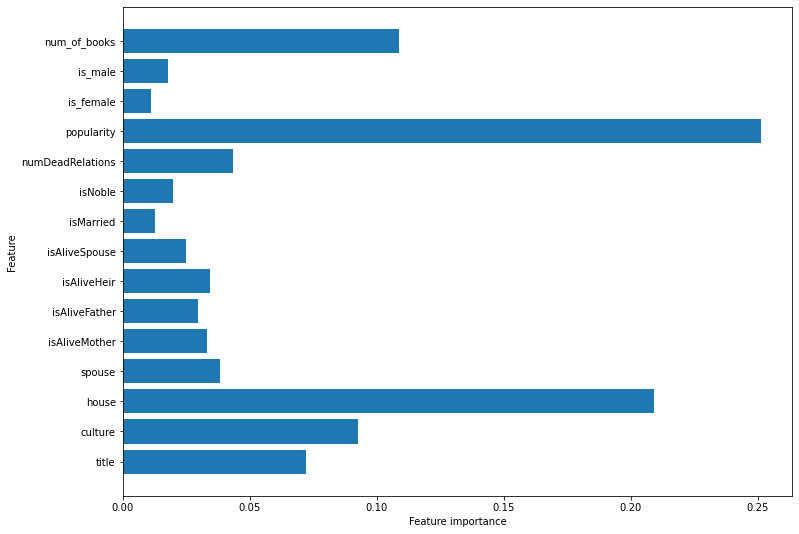

In [41]:
# plotting feature importances
plot_feature_importances(rf_default_fit,
                         train = x_train,
                         export = False)

## 3.3) Random Forest Tuned

In [42]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# declaring a hyperparameter space
estimator_space  = np.arange(1, 4, 1)
criterion_space  = ['gini', 'entropy']
depth_space      = np.arange(1, 9, 1)
leaf_space       = np.arange(1, 10, 1)
bootstrap_space  = [True, False]
warm_start_space = [True, False]


# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_space,
              'criterion'        : criterion_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space,
              'bootstrap'        : bootstrap_space,
              'warm_start'       : warm_start_space}


# INSTANTIATING the model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               param_distributions = param_grid,
                               cv           = 3,
                               n_iter       = 10,
                               random_state = 219,
                               scoring      = make_scorer(roc_auc_score,
                                            needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
forest_cv.fit(X, y)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", forest_cv.best_params_)
print("Tuned Training AUC:", forest_cv.best_score_.round(4))


Tuned Parameters  : {'warm_start': False, 'n_estimators': 1, 'min_samples_leaf': 3, 'max_depth': 6, 'criterion': 'entropy', 'bootstrap': True}
Tuned Training AUC: 0.5732


In [43]:
# best estimators based on RandomizedSearchCV
forest_cv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3,
                       n_estimators=1, random_state=219)

In [44]:
# building a model based on hyperparameter tuning results

# INSTANTIATING with best_estimator
forest_tuned = RandomForestClassifier(criterion        = 'entropy',
                                      min_samples_leaf = 11,
                                      n_estimators     = 350,
                                      warm_start       = True,
                                      bootstrap        = True,
                                      random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(X, y)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")

# declaring model performance objects
tuned_rf_train_acc = forest_tuned_fit.score(x_train, y_train).round(4)
tuned_rf_test_acc  = forest_tuned_fit.score(x_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = forest_tuned_pred).round(4)


Forest Tuned Training ACCURACY: 0.791
Forest Tuned Testing  ACCURACY: 0.8103
Forest Tuned AUC Score        : 0.63

True Negatives : 13
False Positives: 37
False Negatives: 0
True Positives : 145



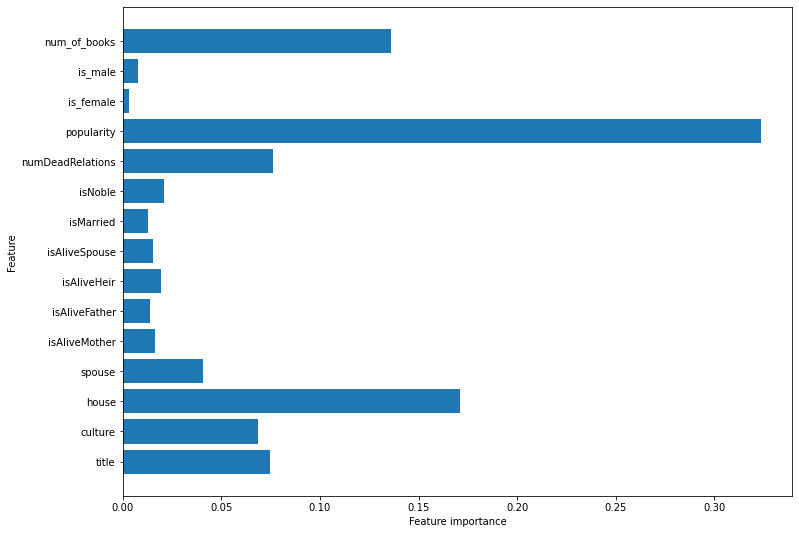

In [45]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

## 3.4) Gradient Boosting Machine

In [46]:
# Gradient boosting classfication with Sklearn library

In [47]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))


Training ACCURACY: 0.8304
Testing ACCURACY : 0.8103
AUC Score        : 0.6562


In [48]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")

# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


True Negatives : 17
False Positives: 33
False Negatives: 4
True Positives : 141



## 3.5) Gradient Boosting Machine Turned

In [49]:
# declaring a hyperparameter space
learn_range        = np.arange(0.01, 0.1, 0.001)
estimator_range    = np.arange(500, 600, 25)
depth_range        = np.arange(2, 9, 1)
warm_start_range   = [True, False]

# creating a hyperparameter grid
param_grid = {'learning_rate' : learn_range,
              'max_depth'     : depth_range,
              'n_estimators'  : estimator_range,
              'warm_start'    : warm_start_range}


# INSTANTIATING the model object without hyperparameters
full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
                           param_distributions = param_grid,
                           cv                  = 3,
                           n_iter              = 10,
                           random_state        = 219,
                           scoring             = make_scorer(roc_auc_score,
                                                 needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
full_gbm_cv.fit(X, y)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

Tuned Parameters  : {'warm_start': False, 'n_estimators': 525, 'max_depth': 8, 'learning_rate': 0.09499999999999992}
Tuned Training AUC: 0.5976


In [50]:
# checking the best estimator for the model
full_gbm_cv.best_estimator_


GradientBoostingClassifier(learning_rate=0.09499999999999992, max_depth=8,
                           n_estimators=525, random_state=219)

In [51]:
# INSTANTIATING with best_estimator
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.1,
                                       max_depth     = 2,
                                       n_estimators  = 200,
                                       warm_start    = True,
                                       random_state  = 219)


# FITTING to the FULL DATASET (due to cross-validation)
gbm_tuned_fit = gbm_tuned.fit(X, y)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")
# declaring model performance objects
gbm_t_train_acc = gbm_tuned_fit.score(x_train, y_train).round(4)
gbm_t_test_acc  = gbm_tuned_fit.score(x_test, y_test).round(4)
gbm_t_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)


Training ACCURACY: 0.8098
Testing  ACCURACY: 0.8359
AUC Score        : 0.6931

True Negatives : 20
False Positives: 30
False Negatives: 2
True Positives : 143



# Model Comparison

In [52]:
# Print end result

# Time of script
t1 = time.time()

script_time = round((t1-t0)/60, 2)

# Compare results
print(f"""

======================================== Model Comparison ========================================



Model           Train Accuracy   Test Accuracy       AUC Score      TN,  FP, FN,  TP
-----           --------------   -------------       ---------      ----------------
Logistic        {lr_train_score}           {lr_test_score}              {lr_auc}         {LR_tn, LR_fp, LR_fn, LR_tp}
Random Forest   {rf_train_acc}           {rf_test_acc}              {rf_auc}          {rf_tn, rf_fp, rf_fn, rf_tp}
Tuned RF        {forest_tuned_train_score}            {forest_tuned_test_score}              {forest_tuned_auc}           {tuned_rf_tn, tuned_rf_fp, tuned_rf_fn, tuned_rf_tp}
GBM             {gbm_train_acc}           {gbm_test_acc}              {gbm_auc}         {gbm_default_tn, gbm_default_fp, gbm_default_fn, gbm_default_tp}
Tuned GBM       {gbm_t_train_acc}           {gbm_t_test_acc}              {gbm_t_auc}         {gbm_tuned_tn, gbm_tuned_fp, gbm_tuned_fn, gbm_tuned_tp}         



     /---------------------------------------------------\\
     | Tuned GBM is the best model with an AUC of {gbm_t_auc} |
     \\---------------------------------------------------/


""")

print(f"""

Total script run time: {script_time} minutes

""")



======================================== Model Comparison ========================================



Model           Train Accuracy   Test Accuracy       AUC Score      TN,  FP, FN,  TP
-----           --------------   -------------       ---------      ----------------
Logistic        0.7573           0.7538              0.5331         (4, 46, 2, 143)
Random Forest   0.9971           0.7795              0.629          (16, 34, 9, 136)
Tuned RF        0.791            0.8103              0.63           (13, 37, 0, 145)
GBM             0.8304           0.8103              0.6562         (17, 33, 4, 141)
Tuned GBM       0.8098           0.8359              0.6931         (20, 30, 2, 143)         



     /---------------------------------------------------\
     | Tuned GBM is the best model with an AUC of 0.6931 |
     \---------------------------------------------------/





Total script run time: 1.03 minutes


